# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

* Nama:Abrar Argya Adana
* Email: abrar.argya7012@gmail.com
* Id Dicoding: abrar_argya_adana

## **Persiapan**

**Menyiapkan library yang dibutuhkan**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import itertools

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.utils import class_weight

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax




**Menyiapkan data yang akan digunakan**

In [2]:
df = pd.read_csv('data/data.csv', sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Penjelasan Kolom :** 

* Marital Status = 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

* Application mode = 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

* Application order = Application order (between 0 - first choice; and 9 last choice)

* Course = 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

* Daytime/evening attendance = 1 – daytime 0 - evening

* Previous qualification = 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)

* Previous qualification (grade) = Grade of previous qualification (between 0 and 200)

* Nacionality = 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

* Mother's qualification = (daftar panjang level pendidikan ibu)

* Father's qualification = (daftar panjang level pendidikan ayah)

* Mother's occupation = (daftar panjang kode pekerjaan ibu)

* Father's occupation = (daftar panjang kode pekerjaan ayah)

* Admission grade = Admission grade (between 0 and 200)

* Displaced = 1 – yes 0 – no

* Educational special needs = 1 – yes 0 – no

* Debtor = 	1 – yes 0 – no

* Tuition fees up to date = 1 – yes 0 – no

* Gender = 1 – male 0 – female

* Scholarship holder = 1 – yes 0 – no

* Age at enrollment = Age of student at enrollment

* International = 1 – yes 0 – no

* Curricular units 1st sem (credited) = Number of curricular units credited in the 1st semester

* Curricular units 1st sem (enrolled) = Number of curricular units enrolled in the 1st semester

* Curricular units 1st sem (evaluations) = Number of evaluations to curricular units in the 1st semester

* Curricular units 1st sem (approved) = Number of curricular units approved in the 1st semester

* Curricular units 1st sem (grade) = 	Grade average in the 1st semester (between 0 and 20)

* Curricular units 1st sem (without evaluations) = Number of curricular units without evaluations in the 1st semeste

* Curricular units 2nd sem (credited) = 	Number of curricular units credited in the 2nd semester

* Curricular units 2nd sem (enrolled) = Number of curricular units enrolled in the 2nd semester

* Curricular units 2nd sem (evaluations) = Number of evaluations to curricular units in the 2nd semester

* Curricular units 2nd sem (approved) = 	Number of curricular units approved in the 2nd semester

* Curricular units 2nd sem (grade) = Grade average in the 2nd semester (between 0 and 20)

* Curricular units 2nd sem (without evaluations) = Number of curricular units without evaluations in the 2nd semester

* Unemployment rate = Unemployment rate (%)

* Inflation rate = Inflation rate (%)

* GDP = GDP

* Status (Target) = Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course

## **Data Understanding**

**Evaluasi dataframe secara general**

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   int64  
 10 

* Data dominan berupa numerik (integer dan float) kecuali kolom target yaitu status yang berbentuk string.
* Data kategorik seperti gender, marital_status, dan nacionality juga sudah berbentuk numerik (encoded).
* Tidak ada missing values.

**Evaluasi statistik dataframe lebih detil dengan describe()**

In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


* Mayoritas mahasiswa berstatus Single (Marital Status median = 1) dan bukan mahasiswa internasional.
* Sebagian besar mahasiswa mengambil kelas Siang (Daytime) (Mean 0.89 mendekati 1).
* Rata-rata mahasiswa mengambil sekitar 6 unit kurikuler per semester.
* Data menunjukkan variasi makroekonomi yang cukup lebar (GDP dari -4.06 sampai 3.51)
* Mayoritas mahasiswa tampaknya bukan pemegang beasiswa (berdasarkan mean yang rendah) dan perlu dicek lebih lanjut korelasinya dengan kolom Debtor dan Tuition fees up to date.
* Kolom seperti Curricular_units_2nd_sem_enrolled,  Previous_qualification, Curricular_units_1st_sem_without_evaluations	, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_approved, dan Curricular_units_2nd_sem_without_evaluations memiliki outlier yang perlu diteliti lagi di tahap preprocessing.
* Terdapat perbedaan skala yang jauh (misal: GDP di angka satuan, sedangkan Course di angka ribuan). sehingga diperlukan Scaling seperti StandardScaler atau MinMaxScaler di tahap Preprocessing.

**Mengecek adanya duplikasi data**

In [5]:
df.duplicated().sum()

np.int64(0)

Tidak ada duplikasi data

**Cek histogram kolom numerik**

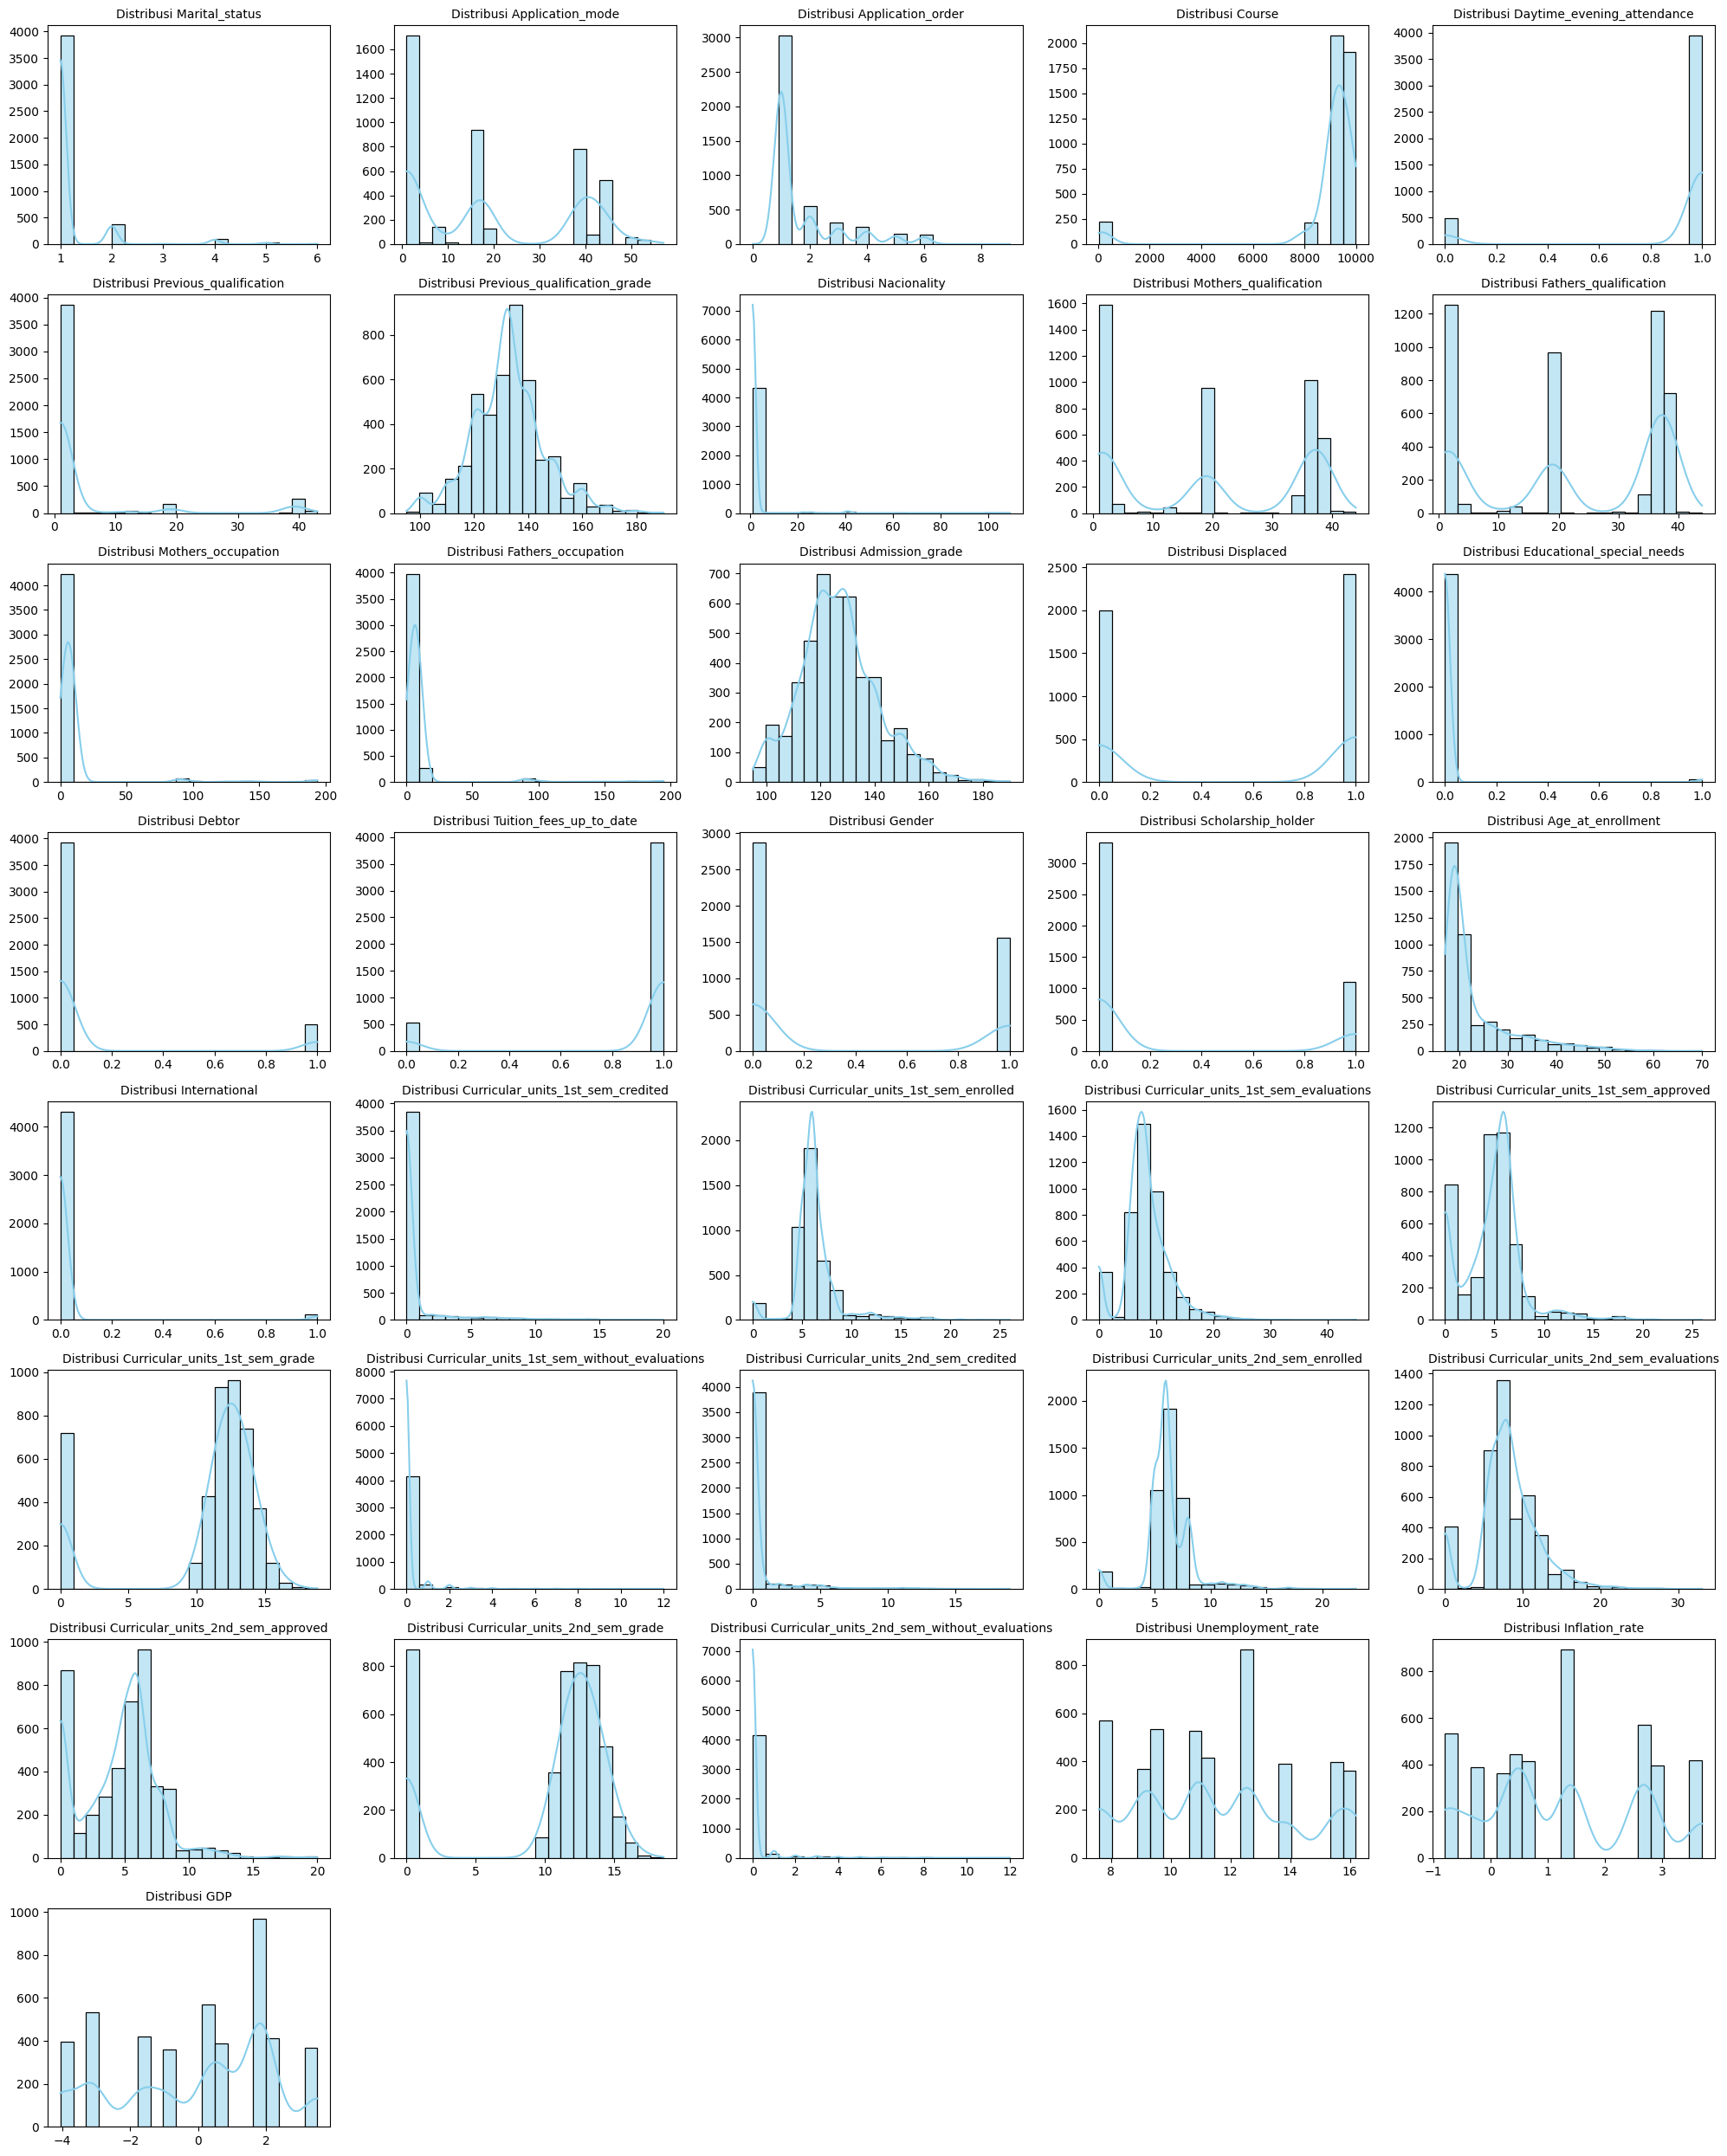

In [6]:
# Memilih kolom numerik 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Mengatur tata letak grid 
plt.figure(figsize=(20, 25))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 5, i) # Sesuaikan grid 
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Insight**

* Dominasi Data Terdistribusi Tidak Normal
Karena datanya tidak simetris (bukan lonceng sempurna), penggunaan Standard Deviation akan menghasilkan batas yang bias. IQR jauh lebih aman karena ia hanya berfokus pada jangkauan nilai di tengah (persentil 25 hingga 75).

* Adanya Nilai Ekstrem (Potensi Outlier)
grafik Curricular_units_1st_sem_enrolled dan Curricular_units_2nd_sem_enrolled mayoritas datanya menumpuk di angka 5-7 unit, namun ada batang-batang kecil yang muncul jauh di angka 20+.

* Fitur Kategorikal yang Ter-encode
    * Grafik seperti Marital_status, Application_mode, dan Course terlihat "berjarak" dan tidak kontinu sehingga ini menegaskan bahwa meskipun tipenya angka (intejer), mereka sebenarnya adalah label kategori.
    * Tidak membersihkan outlier pada kolom kategori yang di-encode, karena angka "6" pada Marital Status bukanlah nilai ekstrem, melainkan kode untuk "Legally Separated".

* Grafik Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade terdapat lonjakan di angka 0. Ini menunjukkan ada kelompok mahasiswa yang tidak memiliki nilai sama sekali (mungkin langsung berhenti di awal).


**Kesimpulan Data Understanding**

1. Handle Outliers

Kolom yang aman dihandle : 
* Akademik Masuk: Previous_qualification_grade, Admission_grade.
* Demografi: Age_at_enrollment (karena distribusinya sangat skewed ke kanan).

Kolom yang Harus Dihindari :
* Kategorikal/Flag: Marital_status, Application_mode, Course, Nacionality, Gender, Scholarship_holder, International, Debtor, Tuition_fees_up_to_date. (Nilai ekstrem di sini adalah kode kategori, bukan kesalahan data).
* Indikator Ekonomi: Unemployment_rate, Inflation_rate, GDP. Fluktuasi ekstrem adalah fakta ekonomi saat itu.

2. Analisis Nilai 0 pada Curricular_units_grade dan Curricular_units_approved

Secara statistik, nilai 0 pada histogram  memang terlihat seperti outlier karena jauh dari median (10-12). Namun, secara bisnis (Educational Data Science), nilai 0 adalah fitur paling penting.
* Indikator Dropout Terkuat: Mahasiswa yang memiliki nilai 0 biasanya adalah mereka yang sama sekali tidak mengikuti ujian, tidak mengumpulkan tugas, atau sudah berhenti sebelum semester berakhir. Jika menghapus baris ini, model akan kehilangan "contoh nyata" dari perilaku mahasiswa yang akan dropout.
* Pembeda Kelompok: Nilai 0 membantu model membedakan antara mahasiswa yang "berjuang tapi nilai rendah" (misal: nilai 8-9) dengan mahasiswa yang "sudah menyerah/tidak aktif" (nilai 0).

    * Cara menanganinya : Feature Engineering dengan buat kolom baru bernama is_inactive_1st_sem yang bernilai 1 jika grade adalah 0, dan 0 jika tidak. Ini memberikan sinyal eksplisit kepada model.

3. Karena angka seperti course dengan kolom lainnya memiliki gap tinggi, maka diperlukan scaling.


## **Exploratory Data Analysis (EDA)**

**Business Questions:**

1. Berapa rata-rata nilai (grade) dan jumlah unit yang lulus (approved) pada Semester 1 dan Semester 2 bagi mahasiswa yang akhirnya berstatus dropout dibandingkan dengan mereka yang lulus (graduate)?

2. Bagaimana distribusi persentase status dropout pada kelompok mahasiswa yang menunggak SPP (Tuition fees up to date = 0) dibandingkan dengan kelompok yang pembayarannya lancar?

3. Kelompok rentang usia (Age at enrollment) manakah yang menunjukkan frekuensi dropout tertinggi, dan bagaimana proporsi status pernikahan (Marital status) pada kelompok usia berisiko tersebut dibandingkan dengan kelompok lainnya?

4. Seberapa besar perbedaan rasio kelulusan (graduation rate) antara mahasiswa penerima beasiswa (Scholarship holder) dengan mahasiswa non-beasiswa?

5. Program Studi (Course) mana yang memiliki presentase dropout tertinggi di semester 1 dan semester 2?

-----------------------------------------------

**Eksplorasi dari *business questions***

1. Berapa rata-rata nilai (grade) dan jumlah unit yang lulus (approved) pada Semester 1 dan Semester 2 bagi mahasiswa yang akhirnya berstatus dropout dibandingkan dengan mereka yang lulus (graduate)?

C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\1700683800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='Status', y='Curricular_units_1st_sem_grade',
C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\1700683800.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='Status', y='Curricular_units_2nd_sem_grade',
C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\1700683800.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='Status', y='Curricular_units_1st_sem_approved',
C:\Users\A

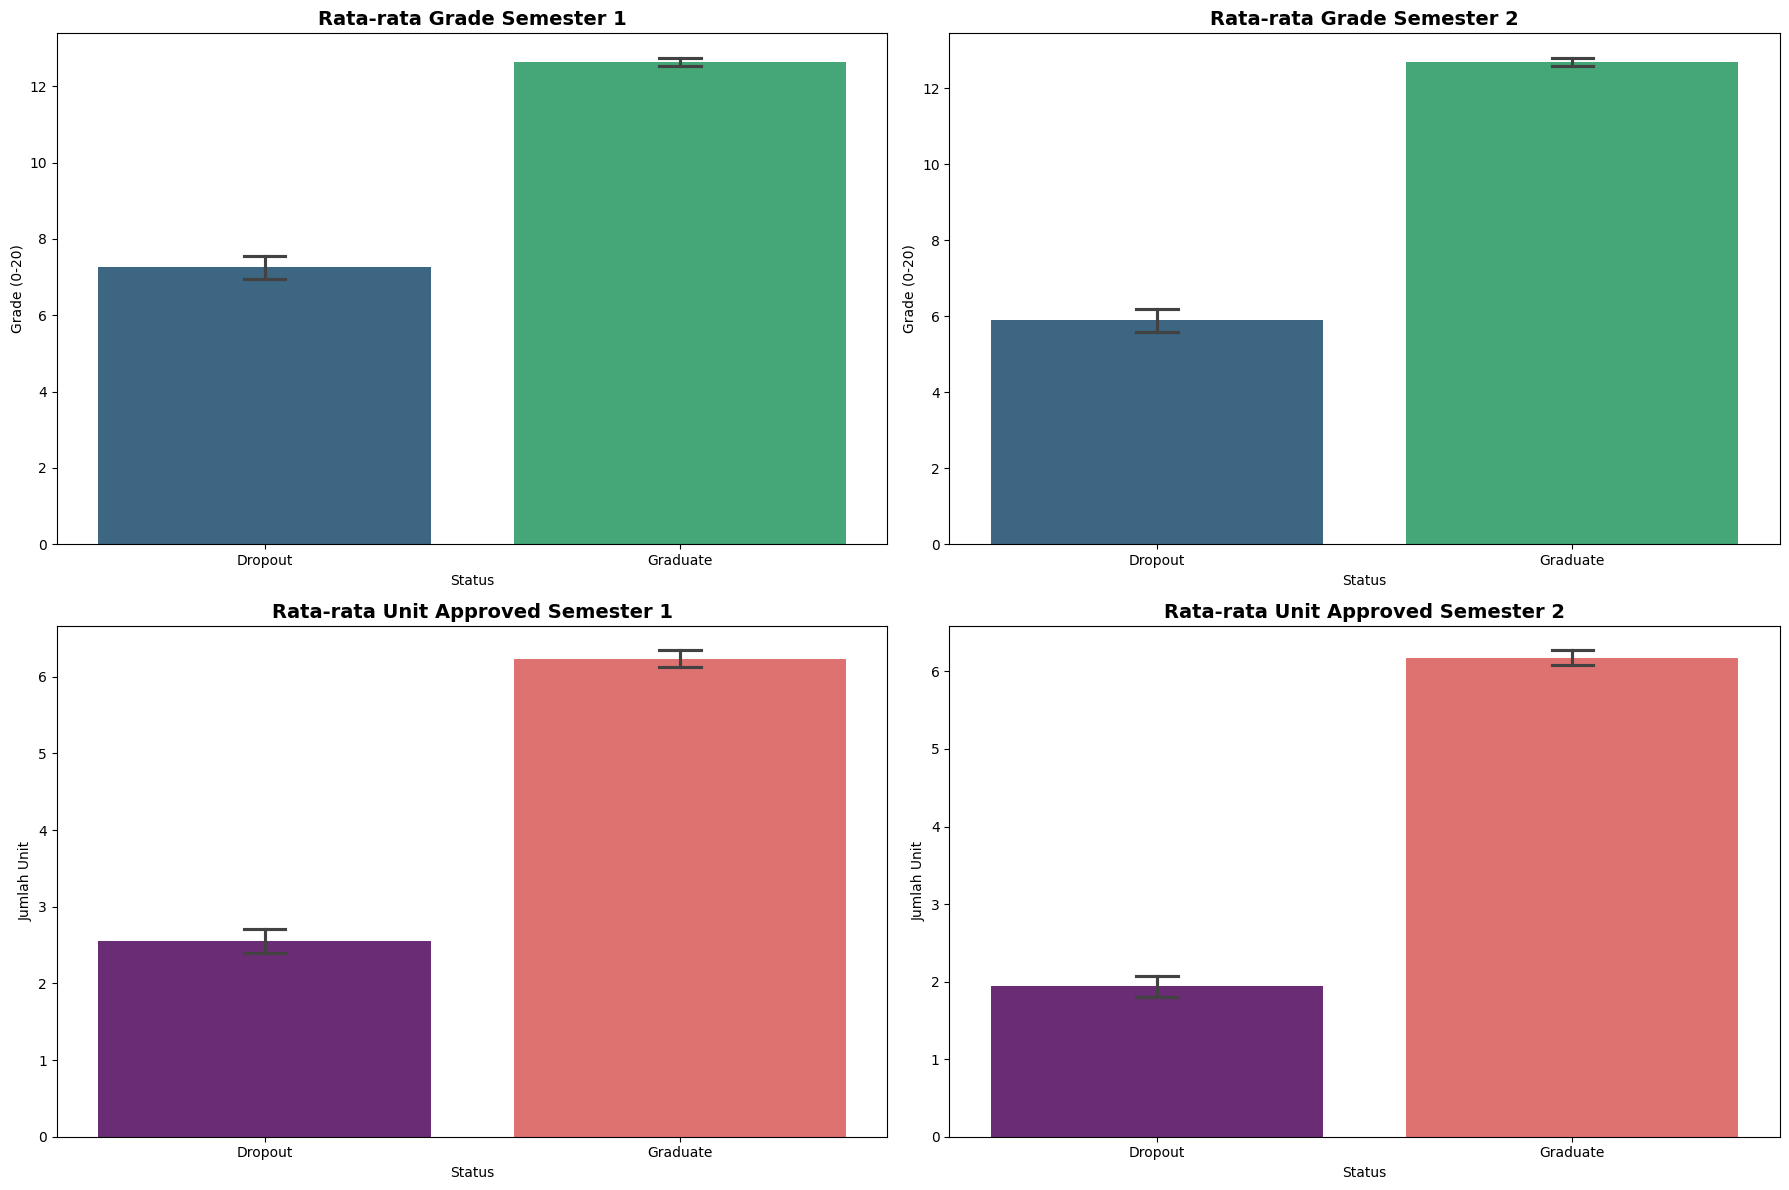

In [7]:
# Filter data untuk memfokuskan perbandingan
df_analysis = df[df['Status'].isin(['Dropout', 'Graduate'])]

# Membuat grid 2x2
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Analisis Grade

# Rata-rata Grade Semester 1
sns.barplot(data=df_analysis, x='Status', y='Curricular_units_1st_sem_grade', 
            palette='viridis', ax=ax[0, 0], capsize=.1)
ax[0, 0].set_title('Rata-rata Grade Semester 1', fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel('Grade (0-20)')

# Rata-rata Grade Semester 2
sns.barplot(data=df_analysis, x='Status', y='Curricular_units_2nd_sem_grade', 
            palette='viridis', ax=ax[0, 1], capsize=.1)
ax[0, 1].set_title('Rata-rata Grade Semester 2', fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel('Grade (0-20)')

# Analisis curricular units approved

# Rata-rata Unit Lulus Semester 1
sns.barplot(data=df_analysis, x='Status', y='Curricular_units_1st_sem_approved', 
            palette='magma', ax=ax[1, 0], capsize=.1)
ax[1, 0].set_title('Rata-rata Unit Approved Semester 1', fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel('Jumlah Unit')

# Rata-rata Unit Lulus Semester 2
sns.barplot(data=df_analysis, x='Status', y='Curricular_units_2nd_sem_approved', 
            palette='magma', ax=ax[1, 1], capsize=.1)
ax[1, 1].set_title('Rata-rata Unit Approved Semester 2', fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel('Jumlah Unit')

# Mengatur tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()

**Insight :**

* Mahasiswa yang akhirnya Graduate menjaga stabilitas nilai di angka ~12.5 pada kedua semester. Sebaliknya, kelompok Dropout mengalami penurunan rata-rata nilai dari ~7 (Sem 1) menjadi ~6 (Sem 2).

* Kelompok Graduate konsisten meluluskan >6 unit, sedangkan kelompok Dropout hanya berhasil lulus sekitar 2.5 unit di Semester 1 dan merosot ke <2 unit di Semester 2.

* Sejak semester pertama, mahasiswa calon dropout sudah bisa diidentifikasi karena rata-rata unit yang mereka luluskan tidak sampai setengah dari kelompok graduate.

* Penurunan pada grafik Semester 2 (baik grade maupun unit approved) bagi kelompok dropout menunjukkan bahwa motivasi atau kemampuan akademik mereka memburuk seiring berjalannya waktu.

**Action Plan :**
* Jaya Jaya Institut harus menandai mahasiswa yang lulus kurang dari 3 unit di Semester 1 sebagai "High Risk".
* Nilai rata-rata di bawah 7 pada semester pertama harus memicu intervensi otomatis berupa bimbingan akademik atau konseling.

--------------------------------------------------------------------------
Jika kita lihat kembali histogram distribusi sebelumnya, lonjakan frekuensi di angka 0 pada kolom grade dan approved units sangat berkorelasi dengan tingginya batang Dropout yang rendah di grafik ini.

2. Bagaimana distribusi persentase status dropout pada kelompok mahasiswa yang menunggak SPP (Tuition fees up to date = 0) dibandingkan dengan kelompok yang pembayarannya lancar?

C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\176541958.py:5: Pandas4Warning: Starting with pandas version 4.0 all arguments of sum will be keyword-only.
  ct_pct = ct.div(ct.sum(1), axis=0) * 100


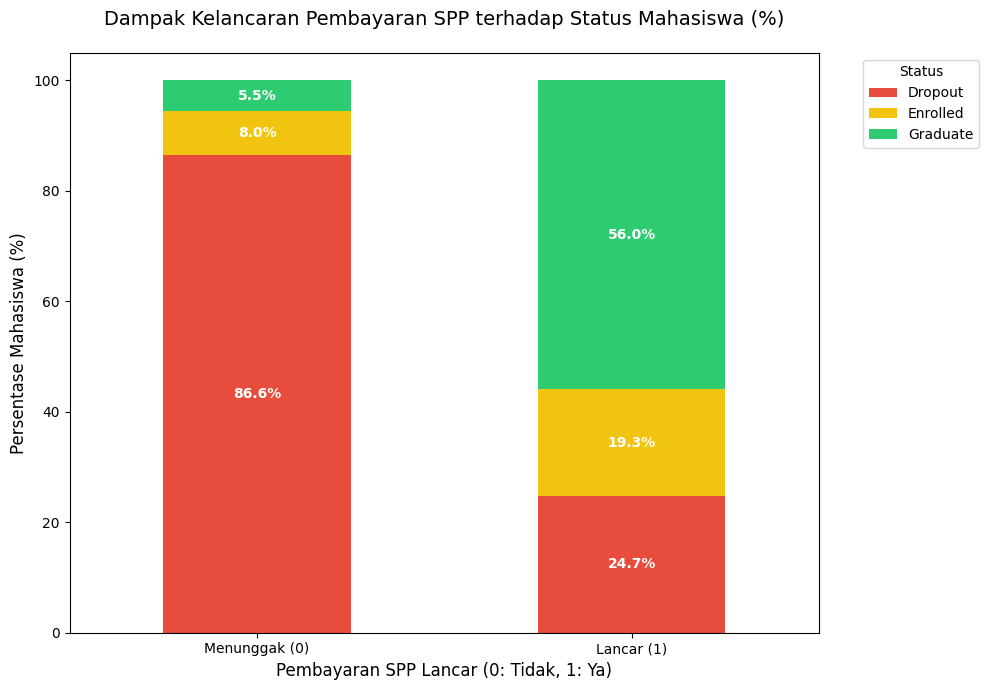

In [8]:
# Menghitung tabel kontingensi (jumlah status per kategori SPP)
ct = pd.crosstab(df['Tuition_fees_up_to_date'], df['Status'])

# Mengubah angka absolut menjadi persentase (Normalisasi ke 100%)
ct_pct = ct.div(ct.sum(1), axis=0) * 100

# Visualisasi 100% Stacked Bar Chart
ax = ct_pct.plot(kind='bar', 
                 stacked=True, 
                 figsize=(10, 7), 
                 color=['#e74c3c', '#f1c40f', '#2ecc71']) # Merah: Dropout, Kuning: Enrolled, Hijau: Graduate

# Menambahkan anotasi persentase di dalam batang
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontweight='bold')

plt.title('Dampak Kelancaran Pembayaran SPP terhadap Status Mahasiswa (%)', fontsize=14, pad=20)
plt.xlabel('Pembayaran SPP Lancar (0: Tidak, 1: Ya)', fontsize=12)
plt.ylabel('Persentase Mahasiswa (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Menunggak (0)', 'Lancar (1)'], rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Insight :**

* Sebanyak 86.6% mahasiswa yang menunggak SPP berakhir dengan status Dropout. Angka ini sangat kontras dibandingkan siswa yang lancar membayar, di mana angka dropout-nya hanya 24.7%.

* Siswa yang pembayaran SPP-nya lancar memiliki peluang lulus (Graduate) sebesar 56.0%, sementara mereka yang menunggak hanya memiliki peluang lulus sebesar 5.5%.

* Siswa yang menunggak cenderung tidak bertahan lama di status Enrolled (hanya 8.0%), mengindikasikan bahwa masalah biaya sering kali memaksa mereka mengambil keputusan cepat untuk berhenti kuliah.

**Action Plan :**

* Dashboard harus memiliki fitur flagging otomatis. Begitu kolom Tuition_fees_up_to_date berubah menjadi 0, sistem harus segera memberikan notifikasi kepada bagian keuangan untuk menawarkan skema cicilan atau beasiswa bantuan sebelum siswa tersebut resmi keluar.

3. Kelompok rentang usia (Age at enrollment) manakah yang menunjukkan frekuensi dropout tertinggi, dan bagaimana proporsi status pernikahan (Marital status) pada kelompok usia berisiko tersebut dibandingkan dengan kelompok lainnya?

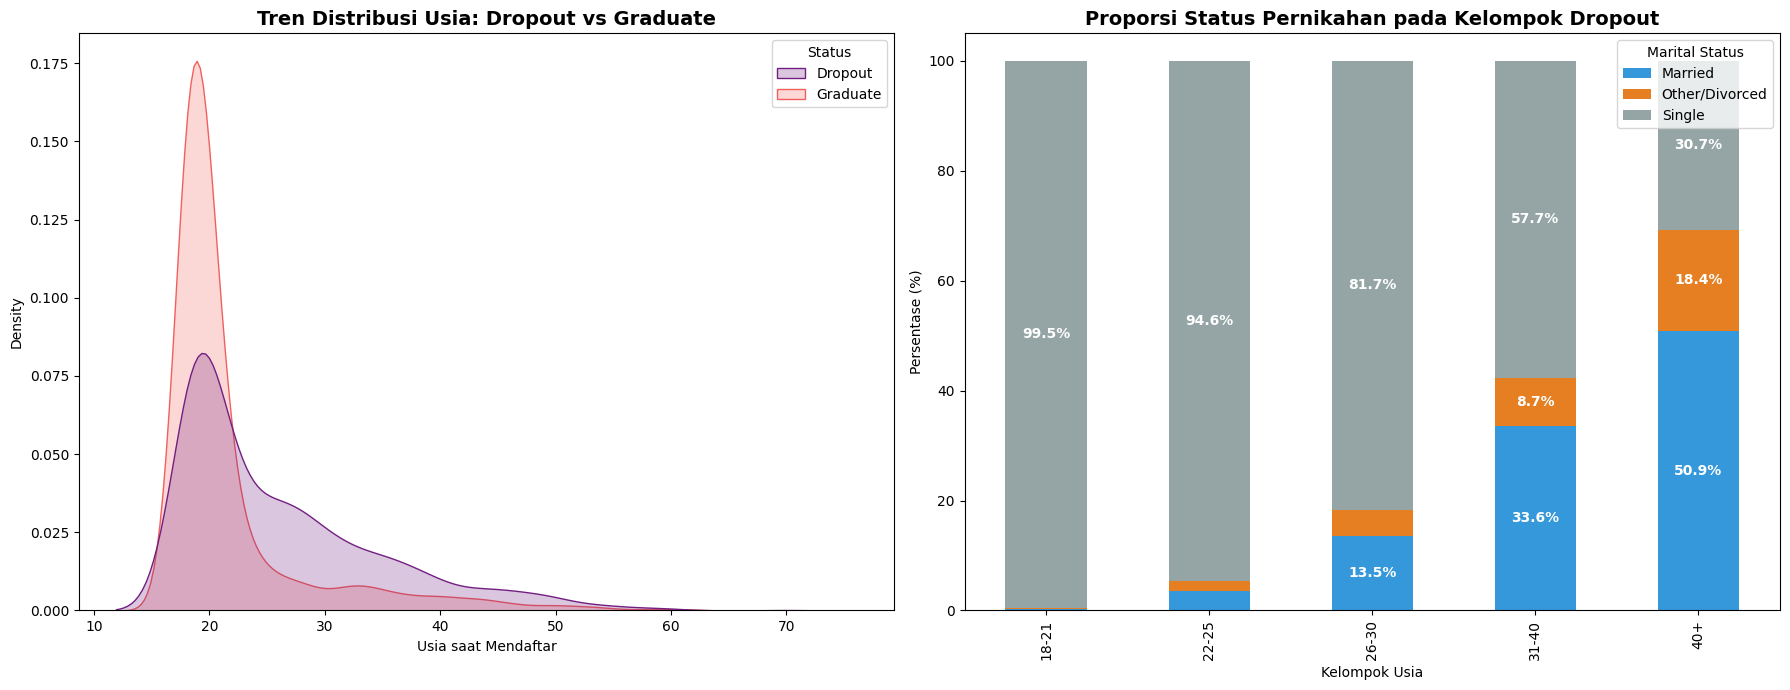

In [9]:
# Filter data untuk perbandingan Dropout vs Graduate
df_analysis = df[df['Status'].isin(['Dropout', 'Graduate'])].copy()

# Membuat Binning Usia agar lebih terukur 
bins = [17, 21, 25, 30, 40, 70]
labels = ['18-21', '22-25', '26-30', '31-40', '40+']
df_analysis['Age_Group'] = pd.cut(df_analysis['Age_at_enrollment'], bins=bins, labels=labels)

# Mapping Marital Status agar labelnya jelas
# 1: single, 2: married, lainnya kita kelompokkan 'Other' untuk penyederhanaan
marital_map = {1: 'Single', 2: 'Married'}
df_analysis['Marital_Label'] = df_analysis['Marital_status'].map(marital_map).fillna('Other/Divorced')

# Membuat Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Grafik Kiri: Distribusi Usia (KDE Plot)
sns.kdeplot(data=df_analysis, x='Age_at_enrollment', hue='Status', fill=True, common_norm=False, 
            palette='magma', ax=ax[0])
ax[0].set_title('Tren Distribusi Usia: Dropout vs Graduate', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Usia saat Mendaftar')

# Grafik Kanan: Kontribusi Status Pernikahan pada Tiap Kelompok Usia Dropout
df_dropout = df_analysis[df_analysis['Status'] == 'Dropout']
ct_marital = pd.crosstab(df_dropout['Age_Group'], df_dropout['Marital_Label'], normalize='index') * 100

ct_marital.plot(kind='bar', stacked=True, color=['#3498db', '#e67e22', '#95a5a6'], ax=ax[1])
ax[1].set_title('Proporsi Status Pernikahan pada Kelompok Dropout', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Persentase (%)')
ax[1].set_xlabel('Kelompok Usia')
ax[1].legend(title='Marital Status', loc='upper right')

# Tambahkan angka persentase di bar chart
for p in ax[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 5: # Hanya tampilkan jika persentase > 5% agar tidak berantakan
        ax[1].text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight :**

* Puncak kelulusan berada pada usia pendaftaran 18-20 tahun. Semakin bertambah usia saat mendaftar (terutama di atas 25 tahun), kurva Dropout mulai menyalip kurva Graduate.

* Pada kelompok usia berisiko tinggi (40+ tahun), lebih dari separuh (50.9%) mahasiswa yang dropout berstatus Married.

* Mahasiswa dewasa yang sudah menikah memiliki risiko dropout yang lebih besar, kemungkinan karena adanya tanggung jawab ganda antara pekerjaan/keluarga dan pendidikan.

----------------------------------------------------------------------------

**Action Plan :**

* Membuat program khusus untuk usia lebih dari 25 tahun seperti jadwal khusus atau mentoring jika tertinggal kelas.
* Membuat program untuk siswa dengan status menikah seperti keringanan biaya.

4. Seberapa besar perbedaan rasio kelulusan (graduation rate) antara mahasiswa penerima beasiswa (Scholarship holder) dengan mahasiswa non-beasiswa?

C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\4189593365.py:5: Pandas4Warning: Starting with pandas version 4.0 all arguments of sum will be keyword-only.
  scholarship_pct = scholarship_counts.div(scholarship_counts.sum(1), axis=0) * 100


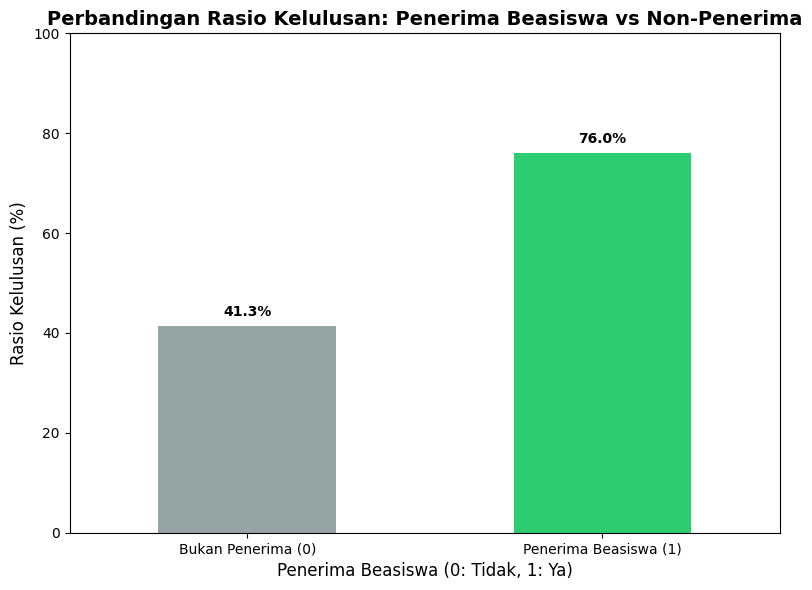

Rasio Kelulusan Non-Beasiswa: 41.32%
Rasio Kelulusan Penerima Beasiswa: 75.98%
Perbedaan/Peningkatan: 34.65%


In [10]:
# Menghitung tabel kontingensi antara Beasiswa dan Status
scholarship_counts = pd.crosstab(df['Scholarship_holder'], df['Status'])

# Menghitung persentase (Normalisasi per baris)
scholarship_pct = scholarship_counts.div(scholarship_counts.sum(1), axis=0) * 100

# Visualisasi Perbandingan Rasio Kelulusan
plt.figure(figsize=(8, 6))
ax = scholarship_pct['Graduate'].plot(kind='bar', color=['#95a5a6', '#2ecc71'])

plt.title('Perbandingan Rasio Kelulusan: Penerima Beasiswa vs Non-Penerima', fontsize=14, fontweight='bold')
plt.xlabel('Penerima Beasiswa (0: Tidak, 1: Ya)', fontsize=12)
plt.ylabel('Rasio Kelulusan (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Bukan Penerima (0)', 'Penerima Beasiswa (1)'], rotation=0)
plt.ylim(0, 100)

# Menambahkan label persentase di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

# Menghitung selisih rasio
grad_rate_non = scholarship_pct.loc[0, 'Graduate']
grad_rate_holder = scholarship_pct.loc[1, 'Graduate']
print(f"Rasio Kelulusan Non-Beasiswa: {grad_rate_non:.2f}%")
print(f"Rasio Kelulusan Penerima Beasiswa: {grad_rate_holder:.2f}%")
print(f"Perbedaan/Peningkatan: {grad_rate_holder - grad_rate_non:.2f}%")

**Insights :**

* Mahasiswa penerima beasiswa memiliki peluang lulus hampir dua kali lipat (75.98%) dibandingkan mereka yang tidak menerima beasiswa (41.32%).

* Beasiswa kemungkinan besar berfungsi sebagai jaring pengaman yang membebaskan mahasiswa dari beban biaya (terkait temuan sebelumnya tentang dampak buruk tunggakan SPP), sehingga mereka bisa lebih fokus pada performa akademik.

* Angka kelulusan yang tinggi pada penerima beasiswa juga bisa mengindikasikan bahwa proses seleksi beasiswa sudah berhasil menyaring mahasiswa yang memang memiliki motivasi dan kemampuan akademik lebih tinggi.


------------------------------------------------------
**Action Plan :**

* Program beasiswa menunjukkan Return on Investment yang sangat positif dalam menekan angka dropout. Institusi disarankan untuk mempertahankan atau bahkan meningkatkan kuota beasiswa.

* Karena kelompok non-beasiswa memiliki rasio kelulusan yang cukup rendah (di bawah 50%), institusi perlu memberikan perhatian ekstra atau mencari bentuk dukungan lain (misal: bimbingan karier atau skema bantuan biaya lain) bagi mereka yang tidak lolos seleksi beasiswa reguler.

5. Program Studi (Course) mana yang memiliki presentase dropout tertinggi di semester 1 dan semester 2?

C:\Users\ACER\AppData\Local\Temp\ipykernel_3080\3528646515.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_rates.values, y=dropout_rates.index, palette='Reds_r')


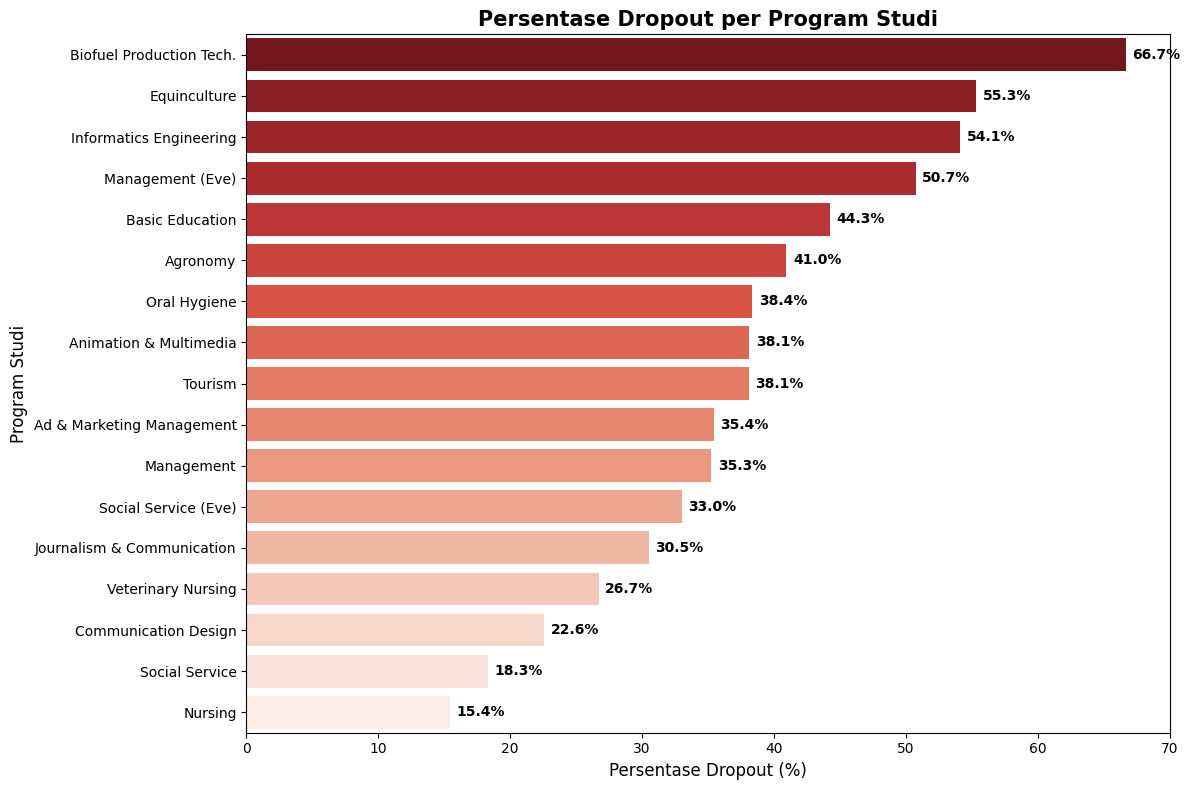

In [11]:
# Mapping Kode Course ke Nama Program Studi (berdasarkan metadata)
course_map = {
    33: 'Biofuel Production Tech.', 171: 'Animation & Multimedia', 
    8014: 'Social Service (Eve)', 9003: 'Agronomy', 
    9070: 'Communication Design', 9085: 'Veterinary Nursing', 
    9119: 'Informatics Engineering', 9130: 'Equinculture', 
    9147: 'Management', 9238: 'Social Service', 
    9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene', 
    9670: 'Ad & Marketing Management', 9773: 'Journalism & Communication', 
    9853: 'Basic Education', 9991: 'Management (Eve)'
}

# Membuat salinan data dan menerapkan mapping
df_course = df.copy()
df_course['Course_Name'] = df_course['Course'].map(course_map)

# Menghitung persentase Dropout per Program Studi
course_status = pd.crosstab(df_course['Course_Name'], df_course['Status'], normalize='index') * 100
dropout_rates = course_status['Dropout'].sort_values(ascending=False)

# Visualisasi Horizontal Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x=dropout_rates.values, y=dropout_rates.index, palette='Reds_r')

plt.title('Persentase Dropout per Program Studi', fontsize=15, fontweight='bold')
plt.xlabel('Persentase Dropout (%)', fontsize=12)
plt.ylabel('Program Studi', fontsize=12)

# Menambahkan label nilai di ujung bar
for i, v in enumerate(dropout_rates.values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight :**

* Program studi STEM & Teknik seperti Biofuel production tech, informatics engineering, dan agronomy memiliki presentase tinggi. Program studi ini ini relatif tinggi karena tingkat kesulitan materi teknis yang sangat spesifik dan tuntutan laboratorium yang tinggi.

* Program studi niche dan spesifik seperti equinculture juga memiliki presentase dropout tinggi. Hal ini bisa disebabkan dari relevansi kurikulum dengan prospek kerja.

----------------------------------------------------------------------------

**Action Plan :**

* Evaluasi kurikulum dan beban program studi yang memiliki presentase dropout lebih dari 30%.
* Berikan prospek karir yang baik pada program studi yang memiliki kesulitan tinggi seperti STEM & Teknik seperti penyerapan tenaga kerja eksklusif dengan perusahaan yang bekerja sama dengan institusi.

**Ekspor df_dashboard untuk kepentingan dashboarding metabase**

In [12]:
# Membuat Dictionary Mapping
mapping_dict = {
    'Marital_status': {
        1: 'Single', 2: 'Married', 3: 'Widower', 
        4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'
    },
    'Application_mode': {
        1: '1st phase - general', 2: 'Ordinance No. 612/93', 5: '1st phase - special (Azores)',
        7: 'Holders of other higher courses', 10: 'Ordinance No. 854-B/99', 15: 'International student',
        16: '1st phase - special (Madeira)', 17: '2nd phase - general', 18: '3rd phase - general',
        26: 'Ordinance No. 533-A/99, b2', 27: 'Ordinance No. 533-A/99, b3', 39: 'Over 23 years old',
        42: 'Transfer', 43: 'Change of course', 44: 'Tech. specialization diploma',
        51: 'Change of institution/course', 53: 'Short cycle diploma', 57: 'Change of inst/course (Int)'
    },
    'Course': {
        33: 'Biofuel Production Tech.', 171: 'Animation & Multimedia Design', 
        8014: 'Social Service (evening)', 9003: 'Agronomy', 9070: 'Communication Design',
        9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
        9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
        9556: 'Oral Hygiene', 9670: 'Ad & Marketing Management', 
        9773: 'Journalism & Communication', 9853: 'Basic Education', 
        9991: 'Management (evening)'
    },
    'Daytime_evening_attendance': {1: 'Daytime', 0: 'Evening'},
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova', 101: 'Mexican',
        103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
    },
    # Kolom Binary (Yes/No)
    'Displaced': {1: 'Yes', 0: 'No'},
    'Educational_special_needs': {1: 'Yes', 0: 'No'},
    'Debtor': {1: 'Yes', 0: 'No'},
    'Tuition_fees_up_to_date': {1: 'Yes', 0: 'No'},
    'Gender': {1: 'Male', 0: 'Female'},
    'Scholarship_holder': {1: 'Yes', 0: 'No'},
    'International': {1: 'Yes', 0: 'No'}
}

# Menduplikasi dataframe khusus untuk dashboard
df_dashboard = df.copy()

# Menerapkan Mapping
for col, mapping in mapping_dict.items():
    if col in df_dashboard.columns:
        df_dashboard[col] = df_dashboard[col].map(mapping)

# Ekspor ke CSV
df_dashboard.to_csv('data/dropout_dashboard.csv', index=False)

## **Data Preparation / Preprocessing**


**Handle Outliers**

Kita menerapkan metode IQR pada fitur-fitur input awal untuk membersihkan anomali data. Namun, untuk fitur performa semester (Grade & Approved Units), nilai 0 tetap dipertahankan karena secara bisnis merupakan indikator fundamental untuk memprediksi risiko dropout.

In [13]:
def handle_smart_outliers(df):
    df_cleaned = df.copy()
    
    # 1. Daftar kolom yang akan dibersihkan secara KETAT (Hapus semua outlier)
    strict_cols = ['Previous_qualification_grade', 'Admission_grade']
    
    # 2. Daftar kolom yang dibersihkan tapi SKIP nilai 0 (Pertahankan sinyal dropout)
    academic_cols = [
        'Curricular_units_1st_sem_grade', 
        'Curricular_units_2nd_sem_grade',
        'Curricular_units_1st_sem_approved',
        'Curricular_units_2nd_sem_approved'
    ]
    
    # Proses Kolom Ketat
    for col in strict_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    # Proses Kolom Akademik (Skip 0)
    for col in academic_cols:
        # Ambil data yang bukan 0 saja untuk hitung batas IQR
        non_zero_data = df_cleaned[df_cleaned[col] > 0][col]
        
        if not non_zero_data.empty:
            Q1 = non_zero_data.quantile(0.25)
            Q3 = non_zero_data.quantile(0.75)
            IQR = Q3 - Q1
            # Kita hanya bersihkan yang di atas (Upper Bound), 
            # karena yang di bawah (0) sudah kita amankan.
            upper_bound = Q3 + 1.5 * IQR
            
            # Hapus data yang melebih batas atas, tapi biarkan yang 0
            df_cleaned = df_cleaned[(df_cleaned[col] <= upper_bound)]
            
    return df_cleaned

# Eksekusi
df_final = handle_smart_outliers(df)

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data akhir: {len(df_final)}")

Jumlah data awal: 4424
Jumlah data akhir: 3920


* **Pembersihan Selektif:** Kita tidak memukul rata semua kolom dengan IQR standar agar tidak kehilangan data penting.

* **Perlindungan Data 0:** Nilai 0 pada kolom akademik tidak dianggap sebagai outlier karena merepresentasikan mahasiswa yang tidak aktif atau gagal, yang merupakan target utama dalam prediksi dropout.

* **Konsistensi Data:** Dengan menghapus nilai yang terlalu tinggi (melebihi upper bound) pada jumlah kurikulum, kita memastikan model tidak belajar dari kasus-kasus sangat langka (seperti siswa jenius yang mengambil kurikulum 2x lipat dari normal).

**Label Encoding vs One Hot Encoding**

Meskipun Label Encoding baik untuk data ordinal, dalam konteks Target Variable (y) pada klasifikasi multi-kelas, Label Encoding adalah standar industri karena:

* Efisiensi Dimensi: Label Encoding menjaga target tetap dalam satu kolom tunggal. Jika menggunakan One-Hot Encoding pada target, algoritma akan memecah label menjadi 3 kolom terpisah, yang justru akan menyulitkan banyak algoritma klasifikasi dalam menghitung loss function atau error.

* Kompatibilitas Model: Sebagian besar algoritma klasifikasi (seperti XGBoost, LightGBM, atau Random Forest) memang mengharapkan target berupa angka integer (0, 1, 2).

* Efisiensi Memori: Label Encoding jauh lebih hemat memori dan secara komputasi lebih murah dibandingkan membuat kolom sparse (banyak angka 0) dengan One-Hot

In [14]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Fit dan Transform pada kolom Status
# Urutan alfabetis :  Dropout (0), Enrolled (1), Graduate (2)
df['Status'] = le.fit_transform(df['Status'])

# Menampilkan pemetaan label
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Pemetaan Label Status: {mapping}")

# 3. Verifikasi hasil
print(df['Status'].value_counts())

Pemetaan Label Status: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Status
2    2209
0    1421
1     794
Name: count, dtype: int64


**One Hot Encoding**

Kenapa Kolom Banyak Kategori Perlu One-Hot?

* Meskipun kolom seperti Course sudah berbentuk angka (misal: 33, 171, 9003), angka-angka tersebut hanyalah label nominal, bukan besaran nilai.

* Mencegah Salah Tafsir Model: Tanpa One-Hot, model (terutama algoritma linear atau berbasis jarak seperti KNN/SVM) akan menganggap bahwa prodi 9003 memiliki nilai "lebih besar" atau "lebih penting" daripada prodi 33.

* Hubungan Antar Kategori: Model akan mencoba mencari pola numerik (misal: $33 + 138 = 171$), padahal secara bisnis, hubungan matematis antar kode prodi tersebut tidak ada artinya sama sekali.

In [15]:
# Daftar kolom kategori yang sudah diperbaiki namanya sesuai index DataFrame
nominal_cols = [
    'Marital_status', 'Application_mode', 'Course', 
    'Previous_qualification', 'Nacionality', 
    'Mothers_qualification', 'Fathers_qualification', 
    'Mothers_occupation', 'Fathers_occupation'
]

# Melakukan One-Hot Encoding
# drop_first=True digunakan untuk menghindari Dummy Variable Trap
df_final = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print(f"Jumlah kolom setelah One-Hot Encoding: {df_final.shape[1]}")

Jumlah kolom setelah One-Hot Encoding: 239


**Train - Test Split**

In [17]:
# Pisahkan Fitur (X) dan Target (y)
X = df_final.drop('Status', axis=1)
y = df_final['Status']

# Train-Test Split (80% Training, 20% Testing)
# Menggunakan stratify=y agar proporsi Dropout/Graduate seimbang di kedua set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**RobustScaler vs StandardScaler**


* **StandardScaler:** Menggunakan Mean dan Standar Deviasi. Jika data  memiliki skewness tinggi atau pencilan (seperti nilai 0 pada grade yang kita pertahankan), mean akan tertarik oleh pencilan tersebut, sehingga hasil scaling-nya menjadi tidak representatif bagi mayoritas data.

* **RobustScaler:** Menggunakan Median dan Interquartile Range (IQR). Karena median dan IQR tidak terpengaruh oleh nilai ekstrem atau distribusi yang miring, scaler ini akan memetakan fitur ke rentang yang lebih "adil" bagi model, tanpa menghilangkan karakteristik unik dari data pencilan tersebut.

Maka, kita gunakan robust scaler untuk kasus ini

In [18]:
# Robust Scaling
# Kita hanya melakukan scaling pada kolom numerik kontinu/diskrit, bukan pada hasil One-Hot (0/1)
numeric_cols = [
    'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

scaler = RobustScaler()

# Fit & Transform pada data Training
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform pada data Testing (Hanya transform, jangan di-fit ulang untuk cegah kebocoran data)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"Jumlah fitur: {X_train.shape[1]}")
print(f"Distribusi Target di Train: \n{y_train.value_counts(normalize=True)}")

Jumlah fitur: 238
Distribusi Target di Train: 
Status
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64


* Jumlah target 1 (enrolled) lebih kecil dibanding klasifikasi lainnya, namun tidak perlu menggunakan teknik ekstrem seperti SMOTE karena sudah dihandle dengan stratify settings dengan memastikan proporsi 18% tadi terjaga di data training maupun testing. Ukuran kelas 1 juga tidak terlalu kecil untuk disebut imbalance.

* Jumlah fitur yang mencapai 238 (akibat One-Hot) jauh lebih berisiko menyebabkan overfitting.

**Strategi Modeling**

1. Gunakan Algoritma yang Kebal Terhadap Dimensi Tinggi seperti Random Forest, Decision Trees, XGBoost, dan LightGBM.
2. **Feature Selection** :
    * **Variance Threshold:** Hapus fitur hasil One-Hot yang isinya hampir semua 0. Jika sebuah kategori hanya muncul 1-2 kali di seluruh dataset, fitur tersebut tidak memberikan pola yang kuat bagi model.

    * **Correlation Analysis:** Hapus salah satu dari dua fitur yang memiliki korelasi sangat tinggi ($>0.9$). Misalnya, jika Mothers_qualification_1 sangat berkorelasi dengan fitur lain, salah satunya bisa dibuang karena memberikan informasi yang redundan.

    * **Feature Importance:** Latih model Random Forest terlebih dahulu, lalu cek fitur mana yang memiliki skor kepentingan paling rendah. Dengan cara ini, kita bisa menghapus 20-30% fitur yang skornya mendekati nol.

    

**Variance Threshold & Korelasi**

In [19]:
# Variance Threshold ---
# Menghapus fitur yang 99.5% isinya sama (misal hampir semua 0)
selector = VarianceThreshold(threshold=(.995 * (1 - .995)))
X_train_v = selector.fit_transform(X_train)
X_test_v = selector.transform(X_test)

# Kembalikan ke DataFrame agar nama kolom tetap terjaga
selected_cols = X_train.columns[selector.get_support()]
X_train_fs = pd.DataFrame(X_train_v, columns=selected_cols)
X_test_fs = pd.DataFrame(X_test_v, columns=selected_cols)

# Correlation Analysis ---
# Mencari fitur dengan korelasi > 0.9
corr_matrix = X_train_fs.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_train_fs = X_train_fs.drop(columns=to_drop)
X_test_fs = X_test_fs.drop(columns=to_drop)

print(f"Fitur tersisa setelah Variance & Correlation: {X_train_fs.shape[1]}")

Fitur tersisa setelah Variance & Correlation: 99


## **Modeling**

**Feature Importance & Modeling**

Buat model baseline random forest untuk melihat fitur - fitur yang penting.

In [20]:
# Latih Model untuk cek Importance
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_selector.fit(X_train_fs, y_train)

# Ambil Feature Importances
importances = rf_selector.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_fs.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Buang 25% Fitur Terendah
threshold_value = feature_importance_df['Importance'].quantile(0.25)
top_features = feature_importance_df[feature_importance_df['Importance'] > threshold_value]['Feature'].tolist()

X_train_final = X_train_fs[top_features]
X_test_final = X_test_fs[top_features]

# Latih Ulang Model Final
rf_final = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_final.fit(X_train_final, y_train)

# Evaluasi
y_pred = rf_final.predict(X_test_final)
print(f"Fitur Final: {len(top_features)}")
print(classification_report(y_test, y_pred))

Fitur Final: 74
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       284
           1       0.49      0.30      0.37       159
           2       0.78      0.92      0.84       442

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.73       885



* strategi perampingan fitur berhasil memangkas dimensi dari 238 menjadi 74 fitur, namun model menghadapi tantangan yang kita prediksi sebelumnya yaitu kesulitan mengenali kelas minoritas.

* **Analisis Kelas Target (Status) :**
    * Graduate (Kelas 2): Performa sangat luar biasa dengan F1-Score 0.84 dan Recall 0.92. Artinya, model hampir tidak pernah melewatkan mahasiswa yang akan lulus.

    * Dropout (Kelas 0): Berada di level moderat (F1-Score 0.76). Model cukup baik dalam mendeteksi potensi mahasiswa keluar, meskipun masih ada beberapa kesalahan tebak.

    * Enrolled (Kelas 1): Ini adalah titik lemah model (F1-Score 0.37). Recall 0.30 menunjukkan bahwa dari 100 mahasiswa yang aslinya masih aktif (enrolled), model hanya mampu menebak 30 orang dengan benar.

* Mengapa Kelas 'Enrolled' Rendah?

Ada dua alasan utama mengapa angka ini muncul:

 * **Status Transisi:** Enrolled adalah status "abu-abu" antara mau Dropout atau mau Graduate. Fitur-fiturnya sering kali tumpang tindih dengan kedua kelas lainnya.

* **Imbalance:** Meskipun 18% bukan ketidakseimbangan yang ekstrim, model Random Forest cenderung memihak pada kelas mayoritas (Graduate) karena memberikan kontribusi akurasi terbesar.

* **Evaluasi Strategi:** Apakah 74 Fitur Sudah Optimal?

Jumlah 74 fitur sudah sangat baik untuk menjaga model tetap ringan dan efisien. Namun, untuk memperbaiki skor kelas minoritas tanpa menambah fitur lagi,  bisa mencoba teknik **Hyperparameter Tuning**.

**Strategi Komparasi Model dan Hyperparameter Tuning**

Alasan Pemilihan Model Komparasi
Pemilihan model ini didasarkan pada keragaman algoritma, mulai dari model statistik klasik hingga Deep Learning, untuk memastikan kita mendapatkan hasil prediksi yang paling stabil dan akurat.

1. Random Forest (RF)

    * Ketahanan Terhadap Outlier: Sangat efektif untuk data kita yang memiliki banyak nilai miring (skewed) dan data yang menyimpang (seperti nilai 0 pada grade semester).

    * Stabilitas: Sebagai model ensemble (kumpulan banyak pohon keputusan), RF sangat stabil dan jarang mengalami overfitting meskipun jumlah fitur kita cukup banyak (74 fitur).

    * Interpretasi: Memberikan fitur Feature Importance yang sangat jelas untuk menjelaskan faktor utama penyebab dropout pada dashboard.

2. XGBoost (Extreme Gradient Boosting)

    * Performa Superior: Sering dianggap sebagai "Gold Standard" untuk data tabular karena kemampuannya menangani hubungan non-linear yang kompleks antar variabel.

    * Regularisasi: Memiliki parameter regularisasi internal yang sangat baik untuk menangani high dimensionality setelah proses One-Hot Encoding.

    * Penanganan Imbalance: Sangat fleksibel dalam memberikan bobot lebih pada kelas minoritas seperti Enrolled atau fokus pada kelas Dropout.

3. LightGBM (Light Gradient Boosting Machine)

    * **Kecepatan & Efisiensi:**  Dirancang untuk melatih data dalam skala besar dengan waktu yang jauh lebih cepat daripada XGBoost konvensional.

    * **Akurasi pada Data Kategorikal:** Sangat handal dalam menangani fitur-fitur kategori (seperti Course atau Marital Status) yang telah diekspansi menjadi banyak kolom.

    * **Optimasi Memori:** Menggunakan teknik Gradient-based One-Side Sampling (GOSS) yang membuatnya tetap ringan meski modelnya sangat dalam.

4. Logistic Regression (LR)

    * **Model Baseline:** Digunakan sebagai standar pembanding minimal. Jika model kompleks (seperti ANN atau XGBoost) tidak jauh lebih baik dari LR, maka kita bisa menggunakan LR karena lebih simpel.

    * **Probabilitas:** Memberikan output berupa peluang (0-1), yang sangat berguna jika pihak kampus ingin melihat seberapa besar "risiko" seorang mahasiswa untuk dropout secara persis.

    * **Efisiensi:** Sangat cepat dilatih dan mudah diimplementasikan kembali ke dalam sistem aplikasi kampus.

5. Artificial Neural Network (ANN)

    * **Deep Learning Power:** Mampu menangkap pola tersembunyi (hidden patterns) yang mungkin terlewatkan oleh algoritma berbasis pohon atau linear.

    * **Fleksibilitas:** Dapat disesuaikan arsitekturnya (jumlah layer dan neuron) untuk secara khusus belajar membedakan status "abu-abu" pada mahasiswa Enrolled.

    * **Generalisasi:** Jika di-tune dengan benar menggunakan dropout layer dan early stopping, ANN bisa memberikan generalisasi yang sangat kuat pada data baru di masa depan.

		
| Model| Status Tuning | Alasan |
| --- | --- | --- |
| Random Forest (Base) | No | Sebagai patokan (baseline) performa awal. |
| Random Forest (Random Search) | Yes | Mencari kombinasi n_estimators dan max_depth terbaik. |
| XGBoost | Yes | XGBoost sangat sensitif terhadap learning_rate dan gamma. Tanpa tuning, ia sering overfit pada data yang kompleks. |
| Logistic Regression | Yes | Perlu tuning pada parameter C (regularisasi) dan solver. |
| ANN (Neural Network) | Yes | Wajib tuning pada jumlah hidden layers, dropout rate, dan optimizer agar tidak terjebak di local minima.


**Strategi Optimasi Metrik Pada Hyperparameter**

*kita memprioritaskan F1-Score (Weighted/Macro) dibandingkan metrik lainnya.*

1. Mengapa F1-Score (Weighted/Macro)?

F1-Score adalah rata-rata harmonik antara Precision dan Recall. Kita menggunakannya karena:

* Keseimbangan (Balance): F1-Score memastikan model tidak hanya jago menebak mahasiswa yang lulus (high precision) tapi juga tidak melewatkan mahasiswa yang sebenarnya akan keluar (high recall).

* f1_macro: Metrik ini memberikan bobot yang sama untuk setiap kelas (Dropout, Enrolled, Graduate). Ini sangat bagus untuk memastikan model tetap berusaha mempelajari kelas Enrolled yang jumlahnya sedikit (18%) tanpa terdistraksi oleh dominasi kelas Graduate.

* f1_weighted: Berbeda dengan macro, metrik ini menghitung rata-rata berdasarkan jumlah sampel di tiap kelas. Ini membantu menjaga performa model agar tetap kuat secara keseluruhan pada distribusi data yang ada.

2. Masalah dengan Accuracy

Akurasi seringkali menjadi metrik yang "menipu" pada data imbalance:

* Jika 50% mahasiswa adalah Graduate, model yang menebak "Semua mahasiswa lulus" akan langsung mendapatkan akurasi 50%.

* Namun, model tersebut gagal total karena tidak bisa mendeteksi satu pun mahasiswa yang Dropout.

* Oleh karena itu, akurasi tinggi tidak selalu berarti model tersebut berguna untuk tujuan intervensi kampus.

3. Peran Precision dan Recall

Meskipun kita mengoptimalkan F1-Score selama pelatihan, kita tetap memantau Precision dan Recall secara terpisah untuk pengambilan keputusan bisnis:

| Metrik | 	Makna Bisnis di Jaya Jaya Institut |
|---| ---|
Precision	| Efisiensi Intervensi: Jika model memprediksi seseorang akan dropout, seberapa sering prediksi itu benar? Precision yang tinggi mencegah kampus memberikan bantuan atau konseling kepada mahasiswa yang sebenarnya tidak membutuhkannya (membuang sumber daya).
Recall | 	Keamanan (Capture Rate): Dari semua mahasiswa yang benar-benar akan dropout, berapa banyak yang berhasil dideteksi model? Recall yang tinggi memastikan tidak ada mahasiswa bermasalah yang "lolos" dari pantauan sistem.



**Hyperparameter Tuning Model RF, XGB, LGBM, dan LR**

* menjalankan RandomizedSearchCV serentak untuk mencari kombinasi terbaik dengan metrik f1_weighted
* teknik iterasi ini mengadaptasi fitur Microsoft Fabric yang mengulang pelatihan model hingga mencari model terbaik agar mengurangi inkonsistensi pada saat menjalankan training model satu per satu

In [24]:
# Penyiapan Model dan Parameter Space
models_config = {
    'Random_Forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 300, 500],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            tree_method='hist', # Menggunakan metode histogram yang cepat
            device='cuda',      # Menjalankan di GPU NVIDIA
            random_state=42
        ),
        'params': {
            'n_estimators': [200, 400, 600],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [4, 6, 8]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(class_weight='balanced', max_iter=1000), 
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['lbfgs', 'saga']
        }
    }
}
best_classic_models = {}

# Loop Training Iteratif
for name, config in models_config.items():
    print(f"Mengoptimalkan {name}...")
    search = RandomizedSearchCV(
        config['model'], 
        config['params'], 
        n_iter=10, 
        cv=3, 
        scoring='f1_weighted', 
        n_jobs=-1, 
        random_state=42
    )
    search.fit(X_train_final, y_train)
    best_classic_models[name] = search.best_estimator_
    print(f"Selesai! {name} terbaik ditemukan.")

Mengoptimalkan Random_Forest...
Selesai! Random_Forest terbaik ditemukan.
Mengoptimalkan XGBoost...
Selesai! XGBoost terbaik ditemukan.
Mengoptimalkan Logistic_Regression...


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Selesai! Logistic_Regression terbaik ditemukan.


**Pelatihan ANN**

Model ini dipisah karena : 

1. Mekanisme Training (Epochs vs Iterations)

Model klasik seperti Random Forest atau XGBoost sekali dilatih langsung jadi. Sedangkan ANN berlatih secara bertahap melalui Epochs. Ia melihat data berulang kali, memperkecil error (loss) sedikit demi sedikit. Memasukkan ANN ke dalam loop pencarian parameter standar akan sangat berat karena ANN membutuhkan waktu jauh lebih lama untuk setiap satu "percobaan" parameter.

2. Penanganan Overfitting (Early Stopping)

ANN sangat mudah mengalami overfitting (pintar di data latihan, gagal di data ujian). Untuk mencegahnya, kita menggunakan teknik Early Stopping. Teknik ini akan memantau performa model secara real-time saat training dan otomatis berhenti ketika akurasi sudah tidak naik lagi. Fitur ini adalah fitur spesifik Deep Learning (Keras/TensorFlow) yang tidak dimiliki oleh model klasik di scikit-learn.

3. Pengaturan Bobot Kelas (Class Weights)

Karena data kita tidak seimbang (imbalance), kita harus memberikan instruksi manual kepada ANN melalui parameter class_weight. Di model klasik, kita cukup menulis class_weight='balanced'. Namun di ANN, kita harus menghitung manual dalam bentuk dictionary agar setiap neuron dalam jaringan saraf tahu kelas mana yang harus diprioritaskan (dalam kasus kita, kelas Dropout).

4. Arsitektur vs Hyperparameter

Pada model klasik, yang kita cari adalah angka (misal: jumlah pohon). Pada ANN, yang kita cari adalah Arsitektur:

* Berapa banyak lapisan (hidden layers)?

* Berapa banyak neuron di setiap lapisannya?

* Berapa besar tingkat Dropout (pemutusan koneksi saraf) untuk mencegah hafalan?

Strategi: 

1. Dengan menyertakan Adamax dan RMSprop, kita memberi peluang bagi model untuk keluar dari local minima yang sering menjebak Adam biasa pada data yang berisik.

2. Kita tidak menebak berapa jumlah layer yang pas. Model akan mencoba sendiri apakah arsitektur dangkal (1 layer) atau dalam (3 layer) yang lebih jago mendeteksi Dropout.

3.  Tuning pada dropout rate sangat krusial karena kita memiliki 74 fitur. Jika dropout terlalu kecil, model akan menghafal (memorize); jika terlalu besar, model gagal belajar (underfit).

4.  Jika dalam 5 putaran akurasi tidak membaik, proses berhenti dan mengambil bobot terbaik yang pernah dicapai.

In [35]:
# Definisi search space untuk ANN
# perkecil kombinasi 
param_grid = {
    'n_layers': [1, 2],
    'n_units': [64, 128],
    'dropout_rate': [0.3, 0.5],
    'optimizer': ['adam', 'adamax']
}

# Membuat daftar semua kombinasi parameter
keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

best_f1 = 0
best_ann_model = None
best_params = None


# Menghitung bobot kelas secara otomatis berdasarkan distribusi y_train
weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)

# Mengubah hasil array menjadi dictionary yang dipahami oleh Keras/TensorFlow
class_weights_dict = dict(enumerate(weights))

print(f"Bobot Kelas: {class_weights_dict}")

# Loop
for params in combinations:
    print(f"Testing: {params}")
    
    # Membangun Model sesuai parameter saat ini
    model = Sequential()
    model.add(Dense(params['n_units'], activation='relu', input_dim=X_train_final.shape[1]))
    model.add(Dropout(params['dropout_rate']))
    
    for _ in range(params['n_layers'] - 1):
        model.add(Dense(params['n_units'] // 2, activation='relu'))
        model.add(Dropout(params['dropout_rate']))
        
    model.add(Dense(3, activation='softmax'))
    
    # Memilih Optimizer
    opt = Adam() if params['optimizer'] == 'adam' else Adamax()
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
    
    # Early Stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Training
    model.fit(
        X_train_final, y_train, 
        epochs=30, 
        batch_size=32, 
        validation_split=0.2,
        class_weight=class_weights_dict,
        callbacks=[early_stop],
        verbose=0
    )
    
    # Evaluasi pada data test
    y_pred_probs = model.predict(X_test_final)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # fokus pada F1 Score
    current_f1 = f1_score(y_test, y_pred, average='weighted')
    
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_ann_model = model
        best_params = params
        print(f"Model terbaik ANN ditemukan")

print(f"Best Params: {best_params}")

Bobot Kelas: {0: np.float64(1.0375256523013778), 1: np.float64(1.857742782152231), 2: np.float64(0.6676098849273722)}
Testing: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model terbaik ANN ditemukan
Testing: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testing: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model terbaik ANN ditemukan
Testing: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.3, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.3, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.5, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Testing: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.5, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testing: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Testing: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Testing: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.3, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.3, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.5, 'optimizer': 'adam'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testing: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.5, 'optimizer': 'adamax'}


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Best Params: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adam'}


## **Evaluation**

**Perbandingan Loss ANN**

Loss adalah "tingkat kesalahan" model selama proses pelatihan

* Jika Training Loss turun tapi Validation Loss malah naik, itu tandanya model sedang menghafal (Overfitting).


Melatih ulang model ANN terbaik dengan parameter: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.5, 'optimizer': 'adam'}
Epoch 1/50


c:\Users\ACER\.virtualenvs\Jaya_Jaya_Institut_Dropout-txolCALg\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4917 - loss: 1.1026 - val_accuracy: 0.6638 - val_loss: 0.8192
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6182 - loss: 0.9072 - val_accuracy: 0.6638 - val_loss: 0.7632
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6535 - loss: 0.8495 - val_accuracy: 0.6794 - val_loss: 0.7223
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6704 - loss: 0.8098 - val_accuracy: 0.6963 - val_loss: 0.6907
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - loss: 0.7836 - val_accuracy: 0.7119 - val_loss: 0.6661
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - loss: 0.7569 - val_accuracy: 0.7048 - val_loss: 0.6626
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7100 - loss: 0.7435 - val_accuracy: 0.7062 - val_loss: 0.6564
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7156 - loss: 0.7282 - val_accuracy: 0.7316 - val_loss: 0.6315
Epo

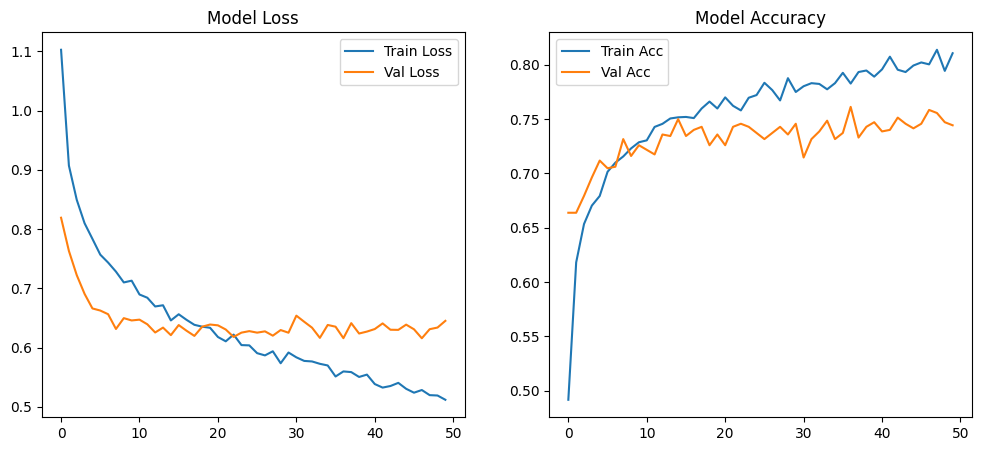

In [37]:
# Jalankan model ANN terbaik dengan parameter optimal
print(f"Melatih ulang model ANN terbaik dengan parameter: {best_params}")

# Membangun ulang arsitektur terbaik
final_model = Sequential()
final_model.add(Dense(best_params['n_units'], activation='relu', input_dim=X_train_final.shape[1]))
final_model.add(Dropout(best_params['dropout_rate']))
if best_params['n_layers'] > 1:
    final_model.add(Dense(best_params['n_units'] // 2, activation='relu'))
    model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(3, activation='softmax'))

opt = Adam() if best_params['optimizer'] == 'adam' else Adamax()
final_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Simpan ke variabel 'history'
history = final_model.fit(
    X_train_final, y_train,
    epochs=50, # Kita coba lebih lama sedikit
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1
)

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()

plt.show()

**Insight :**

* Grafik loss : grafik train turun menuju 0, grafik validasi turun juga tapi stagnan di x=0,5 dan tidak turun ke 0

    * Kondisi di mana Train Loss menyentuh angka yang sangat rendah (mendekati 0) sementara Validation Loss tertahan di angka 0.5 menunjukkan adanya Overfitting Ringan.

    * Model sudah sangat mahir mempelajari data latihan, tetapi saat bertemu data baru (validasi), ia tidak bisa memberikan prediksi yang lebih akurat lagi selain di level loss 0.5.


* Grafik accuracy : gapnya tidak jauh, garis val accuracy tidak teralu melompa lompat
    * model stabil. Ia tidak bingung saat menghadapi data baru, hanya saja model kurang percaya (akurasi lebih rendah dibandingkan training).

**Komparasi Model**

In [41]:
# List hasil
comparison_results = []


# kumpulkan semua model (Base & Tuned) dalam satu dictionary untuk loop evaluasi
all_models = {
    'RF_Base': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGB_Base': XGBClassifier(random_state=42),
    'LR_Base': LogisticRegression(class_weight='balanced', max_iter=1000),
    'RF_Tuned': best_classic_models['Random_Forest'],
    'XGB_Tuned': best_classic_models['XGBoost'],
    'LR_Tuned': best_classic_models['Logistic_Regression']
}

# Loop Evaluasi Model Klasik (Base & Tuned) ---
for name, model in all_models.items():
    # Fit ulang hanya untuk model Base (Model Tuned sudah dilatih sebelumnya)
    if 'Base' in name:
        model.fit(X_train_final, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_final)
    
    # Ambil report sebagai dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    comparison_results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        
        # Metrik Khusus Kelas Dropout (0)
        'Precision_Dropout(0)': report['0']['precision'],
        'Recall_Dropout(0)': report['0']['recall'],
        'F1_Dropout(0)': report['0']['f1-score'],
        
        # Metrik Khusus Kelas Graduate (2)
        'Precision_Graduate(2)': report['2']['precision'],
        'Recall_Graduate(2)': report['2']['recall'],
        'F1_Graduate(2)': report['2']['f1-score'],
        
        # Rata-rata Tertimbang (Untuk overview)
        'F1_Weighted': report['weighted avg']['f1-score']
    })

# Evaluasi Model ANN Tuned (Terpisah karena cara predict beda) ---
# Mengambil probabilitas tertinggi sebagai prediksi kelas
y_pred_ann = np.argmax(final_model.predict(X_test_final), axis=1)
report_ann = classification_report(y_test, y_pred_ann, output_dict=True)

comparison_results.append({
    'Model': 'ANN_Tuned',
    'Accuracy': report_ann['accuracy'],
    
    # Metrik Khusus Kelas Dropout (0)
    'Precision_Dropout(0)': report_ann['0']['precision'],
    'Recall_Dropout(0)': report_ann['0']['recall'],
    'F1_Dropout(0)': report_ann['0']['f1-score'],
    
    # Metrik Khusus Kelas Graduate (2)
    'Precision_Graduate(2)': report_ann['2']['precision'],
    'Recall_Graduate(2)': report_ann['2']['recall'],
    'F1_Graduate(2)': report_ann['2']['f1-score'],
    
    # Rata-rata 
    'F1_Weighted': report_ann['weighted avg']['f1-score']
})

# Tampilkan hasil komparasi dalam bentuk DataFrame
# Kita urutkan berdasarkan Recall Dropout karena tujuan utama adalah mendeteksi siswa berisiko
df_compare = pd.DataFrame(comparison_results).sort_values(by='Recall_Dropout(0)', ascending=False)

print("--- Tabel Komparasi Model ---")
# Menampilkan tabel
print(df_compare)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
--- Tabel Komparasi Model ---
       Model  Accuracy  Precision_Dropout(0)  Recall_Dropout(0)  \
0    RF_Base  0.748023              0.785714           0.735915   
1   XGB_Base  0.736723              0.764925           0.721831   
4  XGB_Tuned  0.748023              0.780769           0.714789   
3   RF_Tuned  0.731073              0.807377           0.693662   
2    LR_Base  0.726554              0.828326           0.679577   
5   LR_Tuned  0.726554              0.828326           0.679577   
6  ANN_Tuned  0.714124              0.827434           0.658451   

   F1_Dropout(0)  Precision_Graduate(2)  Recall_Graduate(2)  F1_Graduate(2)  \
0       0.760000               0.777351            0.916290        0.841121   
1       0.742754               0.801242            0.875566        0.836757   
4       0.746324               0.798387            0.895928        0.844350   
3       0.746212               0.814004            0.841629        0.827586 

**Model Terpilih : Random Forest (based)**

* Recall Dropout Tertinggi (73.6%) 

RF_Base mampu mendeteksi 73.6% dari seluruh mahasiswa yang benar-benar akan dropout.

jika dibandingkan dengan ANN (65.8%) atau Logistic Regression (67.9%). RF_Base menyelamatkan sekitar 6-8% lebih banyak mahasiswa dibanding model lainnya.

* Recall Graduate Sangat Tinggi (91.6%)

Model ini hampir tidak pernah salah mengenali mahasiswa yang akan lulus. 

* Keseimbangan (Accuracy & F1)

Meskipun fokus pada Recall, akurasi totalnya tetap yang tertinggi (74.8%), setara dengan XGB_Tuned.

**Simpan model terbaik**

In [42]:
# Pilih Model Terbaik
final_model = all_models['RF_Base']

# Ambil Daftar Fitur 
# urutan 74 kolom hasil One-Hot Encoding & Feature Selection
feature_columns = X_train_final.columns.tolist()

# Bungkus semuanya dalam Dictionary
model_package = {
    'model': final_model,         # Otak prediksinya
    'features': feature_columns,  # Peta inputnya (agar urutan kolom tidak tertukar)
    'target_names': ['Dropout', 'Enrolled', 'Graduate'] # Label outputnya
}

# Simpan ke file .joblib
filename = 'dropout_prediction_model.joblib'
joblib.dump(model_package, filename)

print(f"   - Jumlah Fitur yang harus ada: {len(feature_columns)}")
print(f"   - Target Classes: {model_package['target_names']}")

   - Jumlah Fitur yang harus ada: 74
   - Target Classes: ['Dropout', 'Enrolled', 'Graduate']
